In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.examples.tutorials.mnist import input_data
%matplotlib inline  
print ("TENSORFLOW VERSION IS [%s]" % (tf.__version__))

TENSORFLOW VERSION IS [1.1.0]


In [2]:
mnist = input_data.read_data_sets('data/', one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting data/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting data/t10k-labels-idx1-ubyte.gz


In [3]:
# dot(.)을 누른 후 tap키를 사용하여 원하는 내용을 살펴볼 수 있다.

mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [4]:
def print_np(x):
    print ('SHAPE OF is %s' % (x.shape,))
    print ('VALUES LOOK LIKE \n %s' % (x))

In [5]:
# 28x28 이미지를 한줄로 피면 784개의 데이터가 된다.
# 해당 이미지가 55000장이 있는 셈.
print_np(mnist.train.images)

# labels의 수가 10개의 One-hot coding이 되어있음. 
print_np(mnist.train.labels)

SHAPE OF is (55000, 784)
VALUES LOOK LIKE 
 [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
SHAPE OF is (55000, 10)
VALUES LOOK LIKE 
 [[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  1.  0.]]


In [6]:
print_np(mnist.test.images)
print_np(mnist.test.labels)

SHAPE OF is (10000, 784)
VALUES LOOK LIKE 
 [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
SHAPE OF is (10000, 10)
VALUES LOOK LIKE 
 [[ 0.  0.  0. ...,  1.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]


In [7]:
print_np(mnist.validation.images)
print_np(mnist.validation.labels)


# 이를 보면 mnist dataset은
# 55000장의 train data와
# 10000장의 test data
# 5000장의 validation data로 이루어져 있음을 알 수 있다.

SHAPE OF is (5000, 784)
VALUES LOOK LIKE 
 [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
SHAPE OF is (5000, 10)
VALUES LOOK LIKE 
 [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 1.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  1. ...,  0.  0.  0.]
 [ 0.  1.  0. ...,  0.  0.  0.]
 [ 0.  0.  1. ...,  0.  0.  0.]]


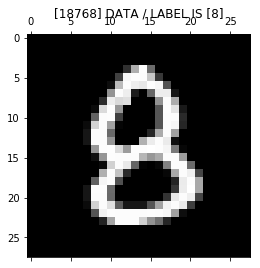

In [13]:
ntrain = mnist.train.images.shape[0]
nsample = 1
randidx = np.random.randint(ntrain, size=nsample)
for i in randidx:
    imgvec = mnist.train.images[i, :]
    labelvec = mnist.train.labels[i, :]
    img = np.reshape(imgvec, (28, 28))
    label = np.argmax(labelvec) # One-hot vector -> label로 바꿔줌
    plt.matshow(img, cmap=plt.get_cmap('gray'))
    plt.title("[%d] DATA / LABEL IS [%d]"%(i, label))

In [12]:
labelvec

array([ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.])

In [18]:
# minibatch learning을 하고자 함.
# 매번 서로다른 데이터를 집어넣기 위해 데이터의 순서를 섞어주는 것.

ntrain = 10
randindices = np.random.permutation(ntrain)
print (randindices.shape)

# 데이터가 섞여 있는지 확인
print (randindices)

(10,)
[9 4 3 0 1 7 6 5 8 2]


In [19]:
# 위 np.random.permutation을 실행할 때마다 데이터의 순서가 바뀌고
# 아래 minibatch 데이터가 매번 바뀌는 것을 확인할 수 있다.

ntrain = 10
nbatch = 4
niter  = ntrain // nbatch + 1
for i in range(niter):
    currindices = randindices[i*nbatch:(i+1)*nbatch]
    print ("ITER: [%d] BATCH INDEX: %s" % (i, currindices))
    # GET BATCH
    xbatch = mnist.train.images[currindices, :]
    ybatch = mnist.train.labels[currindices, :]
    print ("  - SHAPE OF 'XBATCH' IS %s" % (xbatch.shape,))
    print ("  - SHAPE OF 'YBATCH' IS %s" % (ybatch.shape,))

ITER: [0] BATCH INDEX: [9 4 3 0]
  - SHAPE OF 'XBATCH' IS (4, 784)
  - SHAPE OF 'YBATCH' IS (4, 10)
ITER: [1] BATCH INDEX: [1 7 6 5]
  - SHAPE OF 'XBATCH' IS (4, 784)
  - SHAPE OF 'YBATCH' IS (4, 10)
ITER: [2] BATCH INDEX: [8 2]
  - SHAPE OF 'XBATCH' IS (2, 784)
  - SHAPE OF 'YBATCH' IS (2, 10)
